In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive         #importing the data from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/train_loan.csv')

In [4]:
data.head() #add coapp income and app income to a single INCOME

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#To find missing values

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Dealing with categorical values first

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [10]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [11]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [19]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [20]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Dealing with numerical values

In [14]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [15]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [16]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [21]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Outlier detection

In [22]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

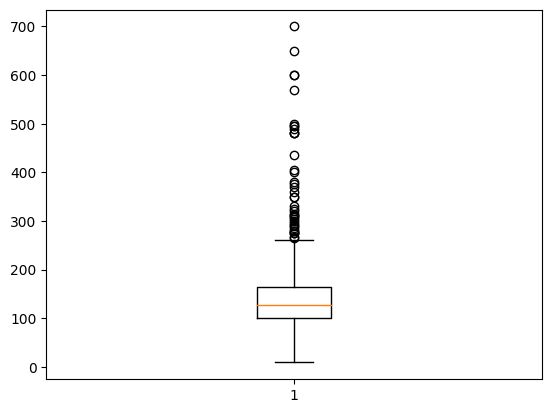

In [23]:
plt.boxplot(data['LoanAmount'])
plt.show()

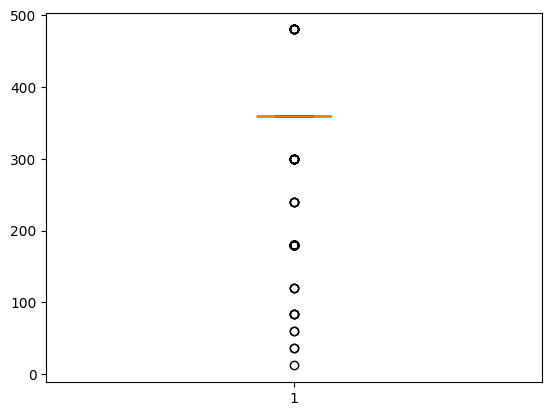

In [26]:
plt.boxplot(data['Loan_Amount_Term'])
plt.show()

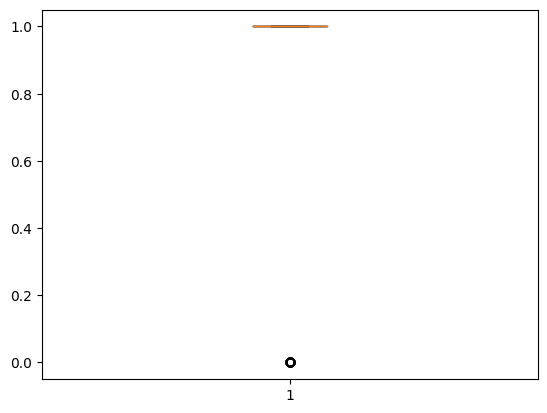

In [27]:
plt.boxplot(data['Credit_History'])
plt.show()

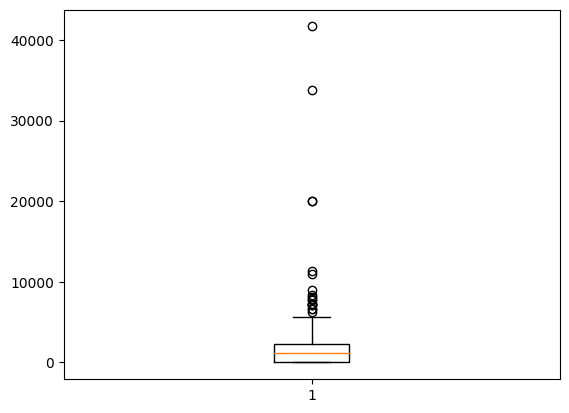

In [28]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

#Encoding

In [29]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total Income'],
      dtype='object')

In [30]:
cat_cols = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

In [31]:
data[cat_cols]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [32]:
data['Dependents'] = data['Dependents'].str.replace('+','')

In [33]:
data['Dependents']=data['Dependents'].astype('int')

In [34]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Total Income         float64
dtype: object

In [35]:
x = data.drop('Loan_Amount_Term',axis=1)
y = data['Loan_Amount_Term']

In [36]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y,6000.0


In [37]:
y.head()

0    360.0
1    360.0
2    360.0
3    360.0
4    360.0
Name: Loan_Amount_Term, dtype: float64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [39]:
y = le.fit_transform(y)

In [40]:
y

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 6, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8,
       5, 8, 2, 8, 8, 8, 7, 8, 8, 9, 8, 8, 7, 8, 8, 8, 8, 8, 6, 8, 8, 8,
       8, 8, 8, 5, 8, 8, 4, 8, 8, 8, 5, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 9,
       8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 9, 8,
       8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 9, 8, 8, 7, 5, 8, 8, 8,
       8, 8, 8, 9, 8, 8, 5, 8, 8, 8, 7, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5,
       2, 8, 8, 5, 8, 5, 9, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8,
       7, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8,

In [41]:
x = pd.get_dummies(x,dtype =int)

In [42]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Total Income,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,1.0,5849.0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,1.0,6091.0,0,1,0,0,...,1,1,0,1,0,1,0,0,1,0
2,0,3000,0.0,66.0,1.0,3000.0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,1.0,4941.0,0,0,0,1,...,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,1.0,6000.0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1


#Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [44]:
x.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = min_max.fit_transform(x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [45]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Total Income,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,0.070489,0.000000,0.172214,1.0,5849.0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,1,0.054830,0.036192,0.172214,1.0,6091.0,0,1,0,0,...,1,1,0,1,0,1,0,0,1,0
2,0,0.035250,0.000000,0.082489,1.0,3000.0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
3,0,0.030093,0.056592,0.160637,1.0,4941.0,0,0,0,1,...,1,0,1,1,0,0,0,1,0,1
4,0,0.072356,0.000000,0.191027,1.0,6000.0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
